<a href="https://colab.research.google.com/github/BibekUpadhyaya/MSD_IPL/blob/main/MSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [241]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [243]:
#to read .csv file
df=pd.read_csv("/content/drive/MyDrive/IPL_ball_by_ball_updated.csv")

In [244]:
df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
#to know the no. of rows and columns
df.shape

(208041, 22)

In [246]:
#Convert to datetime
df['start_date']=pd.to_datetime(df['start_date'])
df['year']=df['start_date'].dt.year

In [247]:
df.tail(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
208040,1254117,2021,2021-10-15,Dubai International Cricket Stadium,2,19.6,Kolkata Knight Riders,Chennai Super Kings,LH Ferguson,CV Varun,DJ Bravo,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021


In [248]:
#We require the data of MS Dhoni for the last 4 years.i.e of CSK 2.0
#runs_off_bat
#no. of sixes
#no. of fours
#player_dismissed

In [249]:
#Data Preprocessing
#df_MS=data having MSD
#df_req=data of last 4 years

In [250]:
df_req=df[df.year>=2018]
df_req.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
150459,1136561,2018,2018-04-07,Wankhede Stadium,2,7.3,Chennai Super Kings,Mumbai Indians,KM Jadhav,MS Dhoni,JJ Bumrah,0,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
150460,1136561,2018,2018-04-07,Wankhede Stadium,2,7.2,Chennai Super Kings,Mumbai Indians,KM Jadhav,MS Dhoni,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
150461,1136561,2018,2018-04-07,Wankhede Stadium,2,7.1,Chennai Super Kings,Mumbai Indians,KM Jadhav,MS Dhoni,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
150462,1136561,2018,2018-04-07,Wankhede Stadium,2,6.6,Chennai Super Kings,Mumbai Indians,KM Jadhav,MS Dhoni,M Markande,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
150463,1136561,2018,2018-04-07,Wankhede Stadium,2,6.5,Chennai Super Kings,Mumbai Indians,KM Jadhav,MS Dhoni,M Markande,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018


In [251]:
df_MS=df_req[df_req['striker']=='MS Dhoni']
df_MS.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
150469,1136561,2018,2018-04-07,Wankhede Stadium,2,6.4,Chennai Super Kings,Mumbai Indians,MS Dhoni,KM Jadhav,M Markande,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
150472,1136561,2018,2018-04-07,Wankhede Stadium,2,7.7,Chennai Super Kings,Mumbai Indians,MS Dhoni,KM Jadhav,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
150473,1136561,2018,2018-04-07,Wankhede Stadium,2,8.1,Chennai Super Kings,Mumbai Indians,MS Dhoni,KM Jadhav,M Markande,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
150475,1136561,2018,2018-04-07,Wankhede Stadium,2,8.3,Chennai Super Kings,Mumbai Indians,MS Dhoni,KM Jadhav,M Markande,0,0,NaN,NaN,NaN,NaN,NaN,lbw,MS Dhoni,NaN,NaN,2018
150484,1136561,2018,2018-04-07,Wankhede Stadium,2,7.6,Chennai Super Kings,Mumbai Indians,MS Dhoni,KM Jadhav,JJ Bumrah,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018


In [252]:
df['runs_off_bat']=df['runs_off_bat'].astype('int')

In [253]:
#no of runs scored
sum(df_MS[df_MS.year==2018]['runs_off_bat']),sum(df_MS[df_MS.year==2019]['runs_off_bat']),sum(df_MS[df_MS.year==2020]['runs_off_bat']),sum(df_MS[df_MS.year==2021]['runs_off_bat'])

(455, 416, 200, 114)

In [254]:
#no of balls faced
len(df_MS[df_MS.year==2018]),len(df_MS[df_MS.year==2019]),len(df_MS[df_MS.year==2020]),len(df_MS[df_MS.year==2021])

(321, 317, 175, 111)

In [255]:
#no of dismissals
len(df_MS[(df_MS.year==2018) & (df_MS.player_dismissed=='MS Dhoni')]),len(df_MS[(df_MS.year==2019) & (df_MS.player_dismissed=='MS Dhoni')]),len(df_MS[(df_MS.year==2020) & (df_MS.player_dismissed=='MS Dhoni')]),len(df_MS[(df_MS.year==2021) & (df_MS.player_dismissed=='MS Dhoni')])

(6, 4, 8, 7)

In [256]:
len(df_MS[df_MS.player_dismissed=='MS Dhoni'])

25

In [257]:
#Strike rate of MS from 2018 to 2021
100*sum(df_MS[df_MS.year==2018]['runs_off_bat'])/len(df_MS[df_MS.year==2018]),100*sum(df_MS[df_MS.year==2019]['runs_off_bat'])/len(df_MS[df_MS.year==2019]),100*sum(df_MS[df_MS.year==2020]['runs_off_bat'])/len(df_MS[df_MS.year==2020]),100*sum(df_MS[df_MS.year==2021]['runs_off_bat'])/len(df_MS[df_MS.year==2021])

(141.74454828660436,
 131.23028391167193,
 114.28571428571429,
 102.70270270270271)

In [258]:
#no of sixes
len(df_MS[(df_MS.year==2018) & (df_MS.runs_off_bat==6)]),len(df_MS[(df_MS.year==2019) & (df_MS.runs_off_bat==6)]),len(df_MS[(df_MS.year==2020) & (df_MS.runs_off_bat==6)]),len(df_MS[(df_MS.year==2021) & (df_MS.runs_off_bat==6)])

(30, 23, 7, 3)

In [259]:
#no of fours
len(df_MS[(df_MS.year==2018) & (df_MS.runs_off_bat==4)]),len(df_MS[(df_MS.year==2019) & (df_MS.runs_off_bat==4)]),len(df_MS[(df_MS.year==2020) & (df_MS.runs_off_bat==4)]),len(df_MS[(df_MS.year==2021) & (df_MS.runs_off_bat==4)])

(24, 22, 16, 12)

In [260]:
#no of 2's
len(df_MS[(df_MS.year==2018) & (df_MS.runs_off_bat==2)]),len(df_MS[(df_MS.year==2019) & (df_MS.runs_off_bat==2)]),len(df_MS[(df_MS.year==2020) & (df_MS.runs_off_bat==2)]),len(df_MS[(df_MS.year==2021) & (df_MS.runs_off_bat==2)])

(18, 35, 11, 5)

In [261]:
#Comparision with Other Players of CSK

In [262]:
#csk_2018
df_csk=df[(df.batting_team=='Chennai Super Kings') & (df.year==2018)]
df_csk.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
150459,1136561,2018,2018-04-07,Wankhede Stadium,2,7.3,Chennai Super Kings,Mumbai Indians,KM Jadhav,MS Dhoni,JJ Bumrah,0,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
150460,1136561,2018,2018-04-07,Wankhede Stadium,2,7.2,Chennai Super Kings,Mumbai Indians,KM Jadhav,MS Dhoni,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
150461,1136561,2018,2018-04-07,Wankhede Stadium,2,7.1,Chennai Super Kings,Mumbai Indians,KM Jadhav,MS Dhoni,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
150462,1136561,2018,2018-04-07,Wankhede Stadium,2,6.6,Chennai Super Kings,Mumbai Indians,KM Jadhav,MS Dhoni,M Markande,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
150463,1136561,2018,2018-04-07,Wankhede Stadium,2,6.5,Chennai Super Kings,Mumbai Indians,KM Jadhav,MS Dhoni,M Markande,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018


In [263]:
csk1=pd.DataFrame(df_csk.groupby('striker')['runs_off_bat'].sum())
csk1.head()

,runs_off_bat
striker,
AT Rayudu,602
DJ Bravo,141
DL Chahar,50
DR Shorey,8
F du Plessis,162


In [264]:
csk1.sort_values(by='runs_off_bat',ascending=False)

,runs_off_bat
striker,
AT Rayudu,602
SR Watson,555
MS Dhoni,455
SK Raina,445
F du Plessis,162
DJ Bravo,141
SW Billings,108
RA Jadeja,89
DL Chahar,50


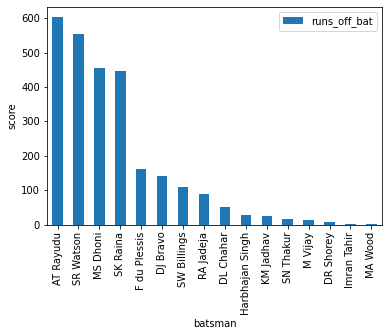

In [265]:
csk1.sort_values(by='runs_off_bat',ascending=False).plot(kind='bar')
plt.xlabel('batsman')
plt.ylabel('score')
plt.show()

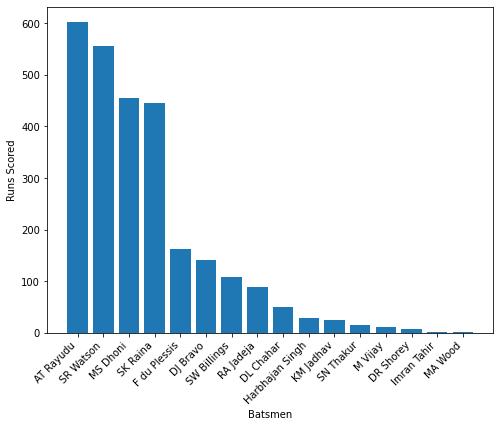

In [266]:
#csk1.sort_values(by='runs_off_bat',ascending=False).plot(kind='bar')
#print(csk1.sort_values(by='runs_off_bat',ascending=False))
data=pd.DataFrame(csk1.sort_values(by='runs_off_bat',ascending=False))
plt.figure(figsize=(8,6))
plt.bar(data.index,data.runs_off_bat)
plt.xlabel('Batsmen')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45, ha='right')
plt.show()

In [267]:
#csk_2019
df_csk=df[(df.batting_team=='Chennai Super Kings') & (df.year==2019)]
df_csk.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
164745,1175356,2019,2019-03-23,MA Chidambaram Stadium,2,5.3,Chennai Super Kings,Royal Challengers Bangalore,AT Rayudu,SK Raina,MM Ali,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
164746,1175356,2019,2019-03-23,MA Chidambaram Stadium,2,6.6,Chennai Super Kings,Royal Challengers Bangalore,SK Raina,AT Rayudu,NA Saini,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
164747,1175356,2019,2019-03-23,MA Chidambaram Stadium,2,5.5,Chennai Super Kings,Royal Challengers Bangalore,SK Raina,AT Rayudu,MM Ali,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
164748,1175356,2019,2019-03-23,MA Chidambaram Stadium,2,5.6,Chennai Super Kings,Royal Challengers Bangalore,AT Rayudu,SK Raina,MM Ali,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
164749,1175356,2019,2019-03-23,MA Chidambaram Stadium,2,6.1,Chennai Super Kings,Royal Challengers Bangalore,SK Raina,AT Rayudu,NA Saini,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [268]:
csk2=pd.DataFrame(df_csk.groupby('striker')['runs_off_bat'].sum())
csk2.head()

,runs_off_bat
striker,
AT Rayudu,282
DJ Bravo,80
DL Chahar,7
DR Shorey,5
F du Plessis,396


In [269]:
csk2.sort_values(by='runs_off_bat',ascending=False)

,runs_off_bat
striker,
MS Dhoni,416
SR Watson,398
F du Plessis,396
SK Raina,383
AT Rayudu,282
KM Jadhav,162
RA Jadeja,106
DJ Bravo,80
M Vijay,64


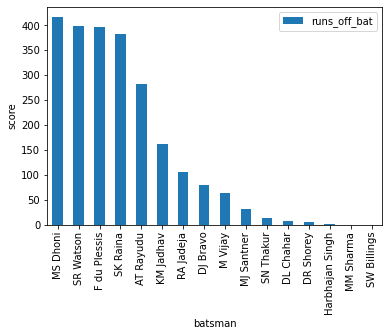

In [270]:
csk2.sort_values(by='runs_off_bat',ascending=False).plot(kind='bar')
plt.xlabel('batsman')
plt.ylabel('score')
plt.show()

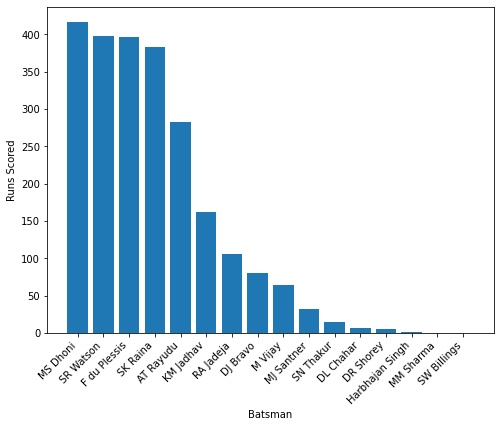

In [271]:
#csk2.sort_values(by='runs_off_bat',ascending=False).plot(kind='bar')
#print(csk2.sort_values(by='runs_off_bat',ascending=False))
data=pd.DataFrame(csk2.sort_values(by='runs_off_bat',ascending=False))
plt.figure(figsize=(8,6))
plt.bar(data.index,data.runs_off_bat)
plt.xlabel('Batsman')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45, ha='right')
plt.show()

In [272]:
#csk_2020
df_csk=df[(df.batting_team=='Chennai Super Kings') & (df.year==2020)]
df_csk.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
179057,1216492,2020,2020-09-19,Sheikh Zayed Stadium,2,6.5,Chennai Super Kings,Mumbai Indians,AT Rayudu,F du Plessis,KH Pandya,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
179058,1216492,2020,2020-09-19,Sheikh Zayed Stadium,2,6.4,Chennai Super Kings,Mumbai Indians,AT Rayudu,F du Plessis,KH Pandya,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
179059,1216492,2020,2020-09-19,Sheikh Zayed Stadium,2,6.3,Chennai Super Kings,Mumbai Indians,F du Plessis,AT Rayudu,KH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
179060,1216492,2020,2020-09-19,Sheikh Zayed Stadium,2,6.2,Chennai Super Kings,Mumbai Indians,AT Rayudu,F du Plessis,KH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
179061,1216492,2020,2020-09-19,Sheikh Zayed Stadium,2,6.1,Chennai Super Kings,Mumbai Indians,F du Plessis,AT Rayudu,KH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020


In [273]:
csk3=pd.DataFrame(df_csk.groupby('striker')['runs_off_bat'].sum())
csk3.head()

,runs_off_bat
striker,
AT Rayudu,359
DJ Bravo,7
DL Chahar,7
F du Plessis,449
Imran Tahir,13


In [274]:
csk3.sort_values(by='runs_off_bat',ascending=False)

,runs_off_bat
striker,
F du Plessis,449
AT Rayudu,359
SR Watson,299
RA Jadeja,232
RD Gaikwad,204
MS Dhoni,200
SM Curran,186
KM Jadhav,62
N Jagadeesan,33


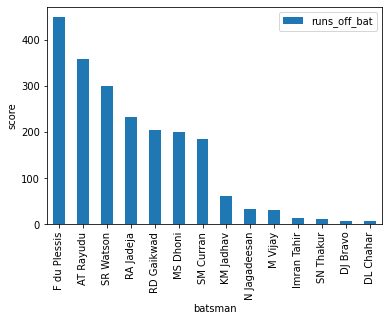

In [275]:
csk3.sort_values(by='runs_off_bat',ascending=False).plot(kind='bar')

plt.xlabel('batsman')
plt.ylabel('score')
plt.show()

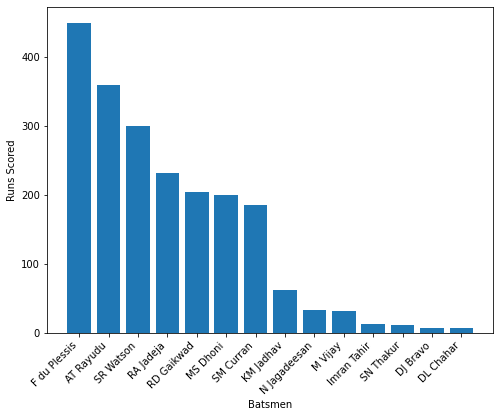

In [276]:

#csk3.sort_values(by='runs_off_bat',ascending=False).plot(kind='bar')
#print(csk3.sort_values(by='runs_off_bat',ascending=False))
data=pd.DataFrame(csk3.sort_values(by='runs_off_bat',ascending=False))
plt.figure(figsize=(8,6))
plt.bar(data.index,data.runs_off_bat)
plt.xlabel('Batsmen')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45, ha='right')
plt.show()

In [277]:
#csk_2021
df_csk=df[(df.batting_team=='Chennai Super Kings') & (df.year==2021)]
df_csk.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
193895,1254059,2021,2021-04-10,"Wankhede Stadium, Mumbai",1,19.5,Chennai Super Kings,Delhi Capitals,RA Jadeja,SM Curran,CR Woakes,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
193896,1254059,2021,2021-04-10,"Wankhede Stadium, Mumbai",1,19.6,Chennai Super Kings,Delhi Capitals,SM Curran,RA Jadeja,CR Woakes,0,0,NaN,NaN,NaN,NaN,NaN,bowled,SM Curran,NaN,NaN,2021
193951,1254059,2021,2021-04-10,"Wankhede Stadium, Mumbai",1,19.4,Chennai Super Kings,Delhi Capitals,RA Jadeja,SM Curran,CR Woakes,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
193985,1254059,2021,2021-04-10,"Wankhede Stadium, Mumbai",1,19.3,Chennai Super Kings,Delhi Capitals,RA Jadeja,SM Curran,CR Woakes,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021
193986,1254059,2021,2021-04-10,"Wankhede Stadium, Mumbai",1,19.1,Chennai Super Kings,Delhi Capitals,SM Curran,RA Jadeja,CR Woakes,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021


In [278]:
csk4=pd.DataFrame(df_csk.groupby('striker')['runs_off_bat'].sum())
csk4.head()

,runs_off_bat
striker,
AT Rayudu,257
DJ Bravo,47
DL Chahar,1
F du Plessis,633
MM Ali,357


In [279]:
csk4.sort_values(by='runs_off_bat',ascending=False).reset_index()

,striker,runs_off_bat
0,RD Gaikwad,635
1,F du Plessis,633
2,MM Ali,357
3,AT Rayudu,257
4,RA Jadeja,227
5,SK Raina,160
6,RV Uthappa,115
7,MS Dhoni,114
8,SM Curran,56
9,DJ Bravo,47


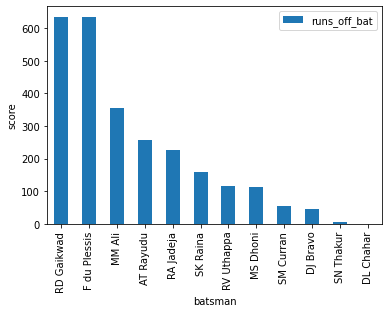

In [280]:
csk4.sort_values(by='runs_off_bat',ascending=False).plot(kind='bar')

plt.xlabel('batsman')
plt.ylabel('score')
plt.show()

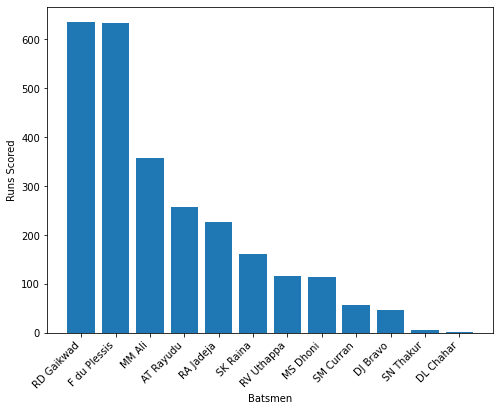

In [287]:
#csk4.sort_values(by='runs_off_bat',ascending=False).plot(kind='bar')
#print(csk4.sort_values(by='runs_off_bat',ascending=False))
data=pd.DataFrame(csk4.sort_values(by='runs_off_bat',ascending=False))
plt.figure(figsize=(8,6))
plt.bar(data.index,data.runs_off_bat)
plt.xlabel('Batsmen')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45, ha='right')
plt.show()

In [282]:
#Lets find top run scrorer of other teams in 2020 & 2021

In [283]:
#MI2020
df_mi=df[(df.batting_team=='Mumbai Indians') & (df.year==2018)]
df_mi.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
150582,1136561,2018,2018-04-07,Wankhede Stadium,1,19.6,Mumbai Indians,Chennai Super Kings,HH Pandya,KH Pandya,DJ Bravo,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
150583,1136561,2018,2018-04-07,Wankhede Stadium,1,5.1,Mumbai Indians,Chennai Super Kings,Ishan Kishan,SA Yadav,SR Watson,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
150584,1136561,2018,2018-04-07,Wankhede Stadium,1,5.2,Mumbai Indians,Chennai Super Kings,SA Yadav,Ishan Kishan,SR Watson,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
150585,1136561,2018,2018-04-07,Wankhede Stadium,1,5.3,Mumbai Indians,Chennai Super Kings,SA Yadav,Ishan Kishan,SR Watson,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
150586,1136561,2018,2018-04-07,Wankhede Stadium,1,5.4,Mumbai Indians,Chennai Super Kings,SA Yadav,Ishan Kishan,SR Watson,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018


In [284]:
mi=pd.DataFrame(df_mi.groupby('striker')['runs_off_bat'].sum())
mi.head()

,runs_off_bat
striker,
A Dananjaya,4
BCJ Cutting,96
E Lewis,382
HH Pandya,260
Ishan Kishan,275


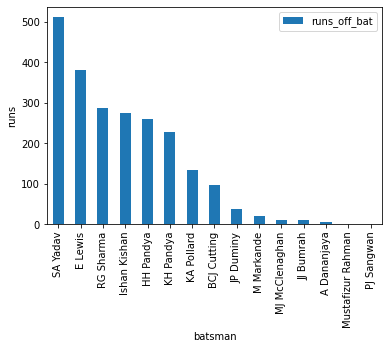

In [285]:
mi.sort_values(by='runs_off_bat',ascending=False).plot(kind='bar')
plt.xlabel('batsman')
plt.ylabel('runs')
plt.show()

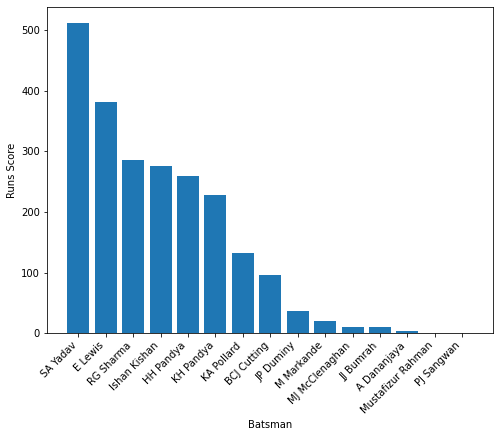

In [286]:
#mi.sort_values(by='runs_off_bat',ascending=False).plot(kind='bar')
#print(mi.sort_values(by='runs_off_bat',ascending=False))
data=pd.DataFrame(mi.sort_values(by='runs_off_bat',ascending=False))
plt.figure(figsize=(8,6))
plt.bar(data.index,data.runs_off_bat)
plt.xlabel('Batsman')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45, ha='right')
plt.show()